# Keras核心教程

## 一，什么是Keras
Keras的优点：
- Keras is an API designed for human beings, not machines.
- This makes Keras easy to learn and easy to use.
- This ease of use does not come at the cost of reduced flexibility.
- Go build cool AR apps with Keras + TF + CoreML + ARKit

## 二，怎样用Keras
**三种API风格：**
1. The Sequential Model
  - Dead simple
  - Only for single-input, single-output, sequential layer stacks 
  - Good for 70+% of use cases
2. The functional API
  - Like playing with Lego bricks
  - Multi-input, multi-output, arbitrary static graph topologies
  - Good for 95% of use cases 
3. Model subclassing
  - Maximum flexibility
  - Larger potential error surface

In [7]:
from keras.datasets import mnist
from keras.utils import to_categorical
(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

### 1，The Sequential API

In [8]:
from keras.models import Sequential
from keras.layers import Dense

In [14]:
model = Sequential()
model.add(Dense(256,activation='relu',input_shape=(784,)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

model.fit(x_train,y_train,epochs=5,batch_size=32)

Epoch 1/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.5884 - acc: 0.8497
Epoch 2/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.2804 - acc: 0.9194
Epoch 3/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.2274 - acc: 0.9349
Epoch 4/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.1932 - acc: 0.9455: 0s - loss: 0.1932 - acc:
Epoch 5/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.1683 - acc: 0.9522: 0s - loss: 0.


### 2，The functional API

In [17]:
from keras.layers import Input
from keras.models import Model
inputs = Input(shape=(784,))
h1 = Dense(256,activation='relu')(inputs)
h2 = Dense(128,activation='relu')(h1)
outputs = Dense(10,activation='softmax')(h2)
model = Model(inputs,outputs)
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

model.fit(x_train,y_train,epochs=5,batch_size=32)

Epoch 1/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.5911 - acc: 0.8464
Epoch 2/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.2798 - acc: 0.9195
Epoch 3/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.2286 - acc: 0.9353
Epoch 4/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.1948 - acc: 0.9446
Epoch 5/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.1699 - acc: 0.9512


### 3，Model subclassing

In [21]:
class MyModel(Model):
    def __init__(self):
        super(MyModel,self).__init__(inputs,outputs)
        self.dense1 = Dense(256,activation='relu')
        self.dense2 = Dense(128,activation='relu')
        self.dense3 = Dense(10,activation='softmax')
    def call(self,inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.dense3(x)
cmodel = MyModel()
cmodel.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

cmodel.fit(x_train,y_train,epochs=3,batch_size=32)

Epoch 1/3
60000/60000 [==============================] - 4s 69us/step - loss: 0.1108 - acc: 0.9688
Epoch 2/3
60000/60000 [==============================] - 4s 68us/step - loss: 0.1009 - acc: 0.9716
Epoch 3/3
60000/60000 [==============================] - 4s 69us/step - loss: 0.0930 - acc: 0.9740


#### Remember: use the right tool (API) for the job! 

## 三，一个例子：Building a video captioning model
ImageQA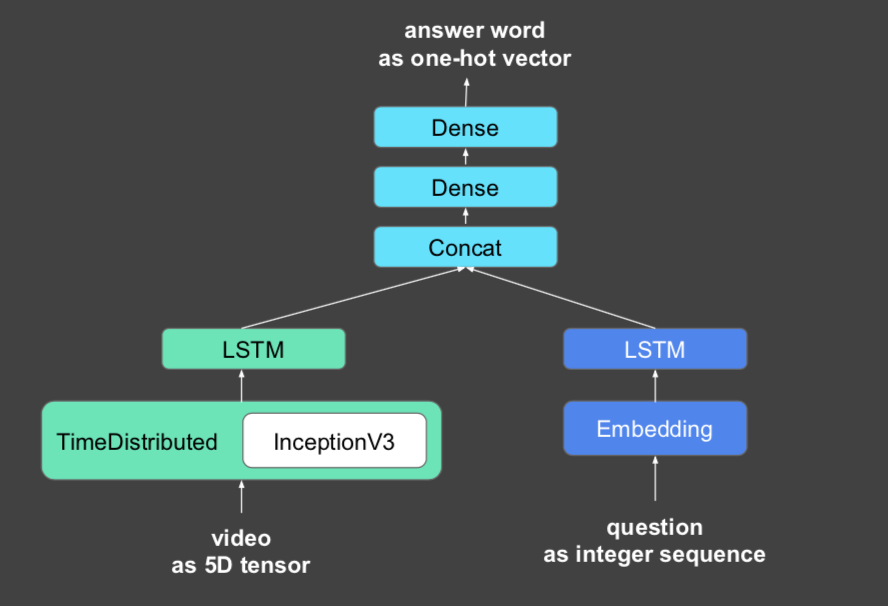

In [3]:
from keras.layers import Input,Dense,TimeDistributed,Embedding
from keras.applications import InceptionV3
from keras.layers.recurrent import LSTM
from keras import layers
from keras.models import Model
import keras

In [2]:
# 1,Turning frames into a vector, with pre-trained representations
video = Input(shape=(None,150,150,3),name='video')
cnn = InceptionV3(weights='imagenet',
                 include_top=False,
                 pooling='avg')
cnn.trainable = False
frame_features = TimeDistributed(cnn)(video)
video_vector = LSTM(256)(frame_features)

87916544/87910968 [==============================] - 162s 2us/step


In [ ]:
# 2,Turning a sequence of words into a vector
input_voc_size = 20000
question = Input(shape=(Mone,),dtype='int32',name='question')
embeded_words = Embedding(input_voc_size,256)(question)
question_vector = LSTM(128)(embedded_words)

In [ ]:
# 3,Concat
x = layers.concatenate([video_vector,question_vector])
x = Dense(128,activation=tf.nn.relu)(x)
predictions = Dense(output_voc_size,
                   activation='softmax',
                   name='predictions')(x)

In [ ]:
# 4,Setting up the training configuration
model = Model([video,question],predictions)
model.compile(optimizer=tf.AdamOptimier(),
             loss=keras.losses.categorical_crossentropy)
model.fit_generator(data_generator,
                   steps_per_epoch=1000,
                   epochs=100)

## 四， Distributed, multi-GPU, & TPU training

## 五， Eager execution